In [730]:
# bbbLeemos el archivo separado por ';'
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('DataSet_Edad-Talla-Peso-TA.csv',sep=';')

In [731]:
# Mostramos un poco de información del archivo.
#df.info()
#df.head()

### CORRECION DE DATOS

In [732]:
# Las columnas Altura y PA_max deberían ser numericos.
# Entonces convertimos la columna altura y PA en un float.
df['Altura']=df['Altura'].str.replace(',','.').astype(float)
df['PA_max']=df['PA_max'].str.replace(',','.').astype(float)

In [733]:
#df.describe()

In [734]:
# Removemos datos nulos
# Elimino todas las filas que contienen al menos algun dato nulo
df=df.dropna(axis=0, how='any')
# Pudimos ver con describe que el minimo de 'Peso' es 0, debemos remover esto.
df=df[df['Peso']!=0]

#df.describe()

In [735]:
# Elimino outlayers
df=df[df['Altura']<3]
df=df[df['Peso']<300]
df=df[df['PA_max']<40]

# Convierte la columna Sexo ('M'/'F') en 2 columnas Hombre y Mujer (1/0)
df['Hombre']=(df.Sexo=='M').astype(int)
df['Mujer']=(df.Sexo=='F').astype(int)
#df.boxplot(column=['Altura','Peso','Edad','PA_max'],figsize=(30,20),vert=False)


In [736]:
#df.boxplot(column='Altura',vert=False,figsize=(20,5))
# Removemos los valores por fuera de 1.5 interquartiles.

alturaInter = (df.Altura.quantile(q=0.75) - df.Altura.quantile(q=0.25))
alturaMax = df.Altura.quantile(q=0.75) + alturaInter
alturaMin = df.Altura.quantile(q=0.25) - alturaInter
df=df[df['Altura'].between(alturaMin, alturaMax, inclusive=True)]

print(alturaMax,alturaMin)


2.0 1.4000000000000001


In [737]:
#df.boxplot(column='Peso',vert=False,figsize=(20,5))
# Removemos los valores por fuera de 1.5 interquartiles.

pesoInter = (df.Peso.quantile(q=0.75) - df.Peso.quantile(q=0.25))
pesoMax = df.Peso.quantile(q=0.75) + pesoInter
pesoMin = df.Peso.quantile(q=0.25) - pesoInter
df=df[df['Peso'].between(pesoMin, pesoMax, inclusive=True)]

print(pesoMax,pesoMin)

138.0 27.0


In [738]:
#df.boxplot(column='Edad',vert=False,figsize=(20,5))
df.describe()


,Altura,Peso,Edad,PA_max,Hombre,Mujer
count,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000
mean,1.684260,79.396885,47.712384,14.905627,0.486310,0.513690
std,0.125312,22.250611,17.357298,3.554499,0.499875,0.499875
min,1.450000,36.000000,18.000000,8.400000,0.000000,0.000000
25%,1.590000,63.000000,33.000000,12.400000,0.000000,0.000000
50%,1.670000,76.000000,47.000000,14.300000,0.000000,1.000000
75%,1.770000,94.000000,63.000000,16.600000,1.000000,1.000000
max,2.000000,138.000000,77.000000,32.300000,1.000000,1.000000


In [739]:
#df.boxplot(column='PA_max',vert=False,figsize=(20,5))
# Removemos los valores por fuera de 1.5 interquartiles.
paInter = (df.PA_max.quantile(q=0.75) - df.PA_max.quantile(q=0.25))
paMax = df.PA_max.quantile(q=0.75) + paInter
paMin = df.PA_max.quantile(q=0.25) - paInter
df=df[df['PA_max'].between(paMin, paMax, inclusive=True)]



In [740]:
# Agrego la columna con el IMC (Peso/(Altura**2)) ya que es un dato muy relacionado con la PA.
df['IMC']=df['Peso']/(df['Altura']**2)
#df.boxplot(column='IMC',vert=False,figsize=(20,5))
# Removemos los valores por fuera de 1.5 interquartiles.
imcInter = (df.IMC.quantile(q=0.75) - df.IMC.quantile(q=0.25))
imcMax = df.IMC.quantile(q=0.75) + imcInter
imcMin = df.IMC.quantile(q=0.25) - imcInter
df=df[df['IMC'].between(imcMin, imcMax, inclusive=True)]

In [741]:
df['EdadPeso']=df['Peso']/df['Edad']

In [824]:
# Regresion Lineal
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df2=df.copy(deep=True)
# Igualamos las escalas de 0 a 1 para luego ver la importancia de cada variable.
# Para eso restamos el valor con el valor minimo y a eso lo dividimos por el rango min-max.
#df2['Altura']=(df['Altura']-df['Altura'].min())/(df['Altura'].max()-df['Altura'].min())
#df2['Peso']=(df['Peso']-df['Peso'].min())/(df['Peso'].max()-df['Peso'].min())
#df2['Edad']=(df['Edad']-df['Edad'].min())/(df['Edad'].max()-df['Edad'].min())
#df2['IMC']=(df['IMC']-df['IMC'].min())/(df['IMC'].max()-df['IMC'].min())
#df2['EdadPeso']=(df['EdadPeso']-df['EdadPeso'].min())/(df['EdadPeso'].max()-df['EdadPeso'].min())

df_train, df_test = train_test_split(df2, test_size=0.2)

# Parametrizamos el X train para correr rapidamente con varias opciones
X_train_opcion = 2
X_train_opciones=[['Altura','Peso', 'Hombre','Mujer', 'Edad', 'IMC'], # 0
                  ['Altura','Peso', 'Edad', 'IMC'], # 1
                  ['Hombre','Mujer','Edad', 'IMC'], # 2
                 ['Altura','Peso', 'Edad', 'IMC', 'EdadPeso']] # 3
# Dividimos los dataset en X e Y
# ---------------------------------------------------------------------------------------------
X_train = df_train[X_train_opciones[X_train_opcion]]
y_train = df_train['PA_max']

X_test = df_test[X_train_opciones[X_train_opcion]]
y_test = df_test['PA_max']

# Creacion, entrenamiento y pronostico del modelo.
# ---------------------------------------------------------------------------------------------
modelo = linear_model.LinearRegression(fit_intercept=True) 
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

# Obtenemos el RMSE
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(y_test, y_pred)**(1/2)
print(f'RMSE: {RMSE}, RMSE/MEDIA= {100*round(RMSE/(df2.PA_max.mean()),2)} %')

RMSE: 2.3161806427330065, RMSE/MEDIA= 16.0 %


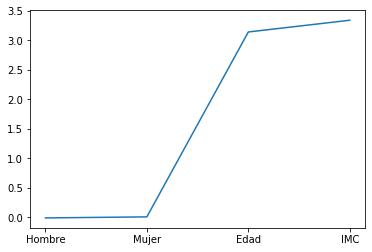

In [825]:
# IMPORTANCIA DE CADA VARIABLE
plt.plot(X_train.columns,modelo.coef_*df.describe()[X_train.columns].iloc[1])
#medias
#df.describe()[X_train.columns].iloc[5]
#df[df.columns[0]].mean()
#modelo.coef_[3]*df.IMC.mean()
# La edad parece estar en primer lugar, seguido por el Peso.
# La altura tambien parece influir negativamente en la presion arterial pero esto
# puede ser para compensar el Peso de la persona.
# el IMC afecta con un poco menos de importancia.

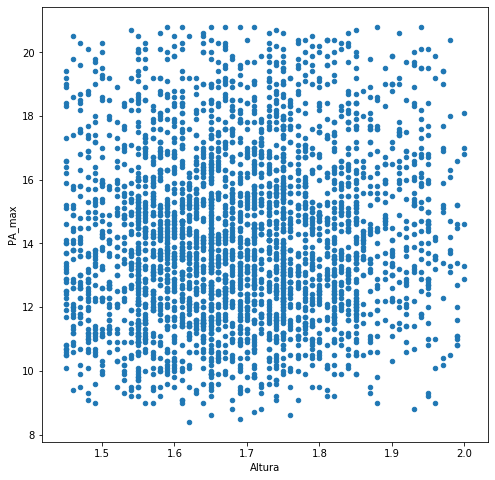

In [648]:
# NO parece haber una tendencia marcada en la altura.
df.plot(kind='scatter',x='Altura',y='PA_max',figsize=[8,8])

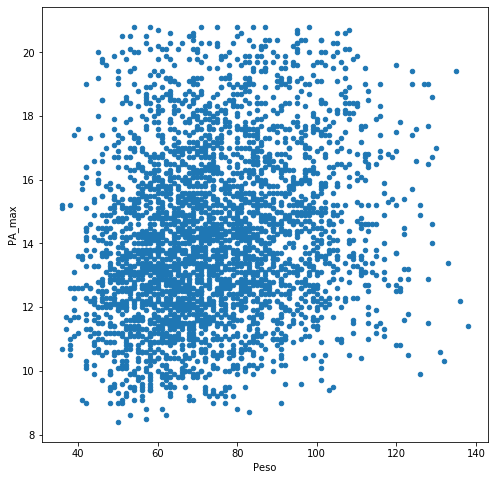

In [646]:
# Parece haber una pequeña tendencia a tener mayor PA a mayor peso, pero no es tan clara.
# Esto puede ser poque el Peso esta muy relacionado con la Altura.
df.plot(kind='scatter',x='Peso',y='PA_max',figsize=[8,8])

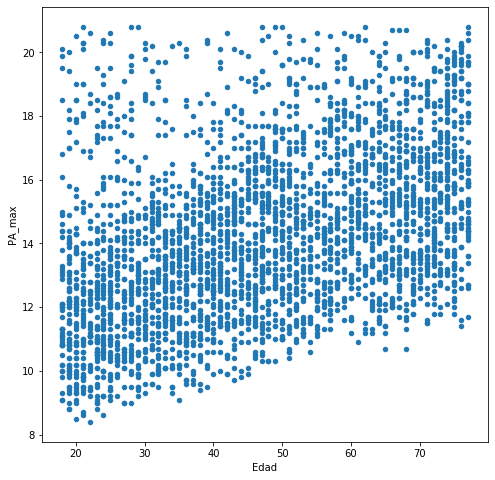

In [644]:
# Podemos ver como las personas con mayor edad, casi linealmente van teniendo mayor PA
df.plot(kind='scatter',x='Edad',y='PA_max',figsize=[8,8])

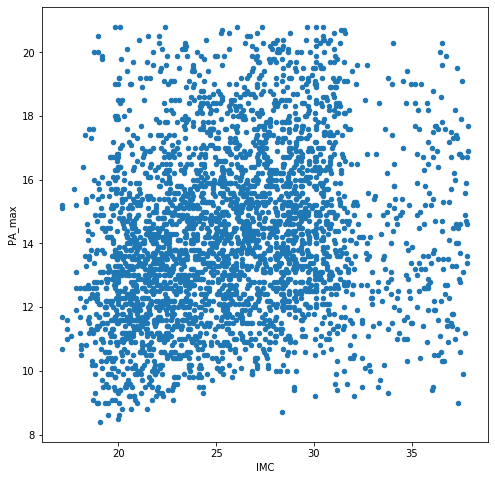

In [645]:
# a Mayor IMC podemos ver una pequeña tendencia a tener mayor PA. (Area central superior del grafico)
df.plot(kind='scatter',x='IMC',y='PA_max',figsize=[8,8])
